#**Dataset for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico.**



This paper presents data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform. This data can be used to generate intelligent computational tools to identify the obesity level of an individual and to build recommender systems that monitor obesity levels. For discussion and more information of the dataset creation, please refer to the full-length article “Obesity Level Estimation Software based on Decision Trees” (De-La-Hoz-Correa et al., 2019).

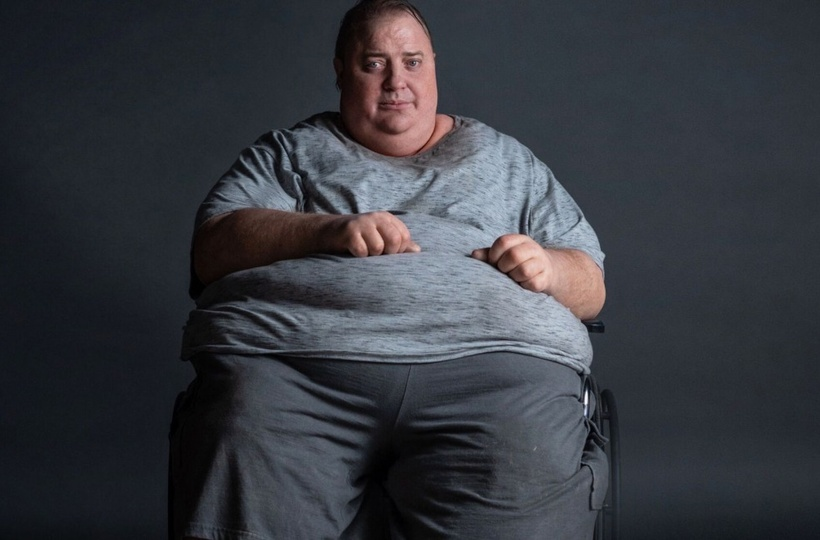

[dataset](https://archive-beta.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition)


In [225]:
import pandas as pd
import numpy as np
import seaborn as sns

url = '/content/ObesityDataSet_raw_and_data_sinthetic.csv'
df = pd.read_csv(url)

#Converting categoric variables to numeric

In [226]:
#All object type are categoric variables
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [227]:
#Replacing 'female' to '0' and 'male' to '0'
#a = df['Gender'].unique()
#print(sorted(a))

df['Gender'].replace(['Female', 'Male'], [0, 1], inplace = True)
#df['Gender']

In [228]:
#Replacing 'no' to '0' and 'yes' to '1'
#a = df['family_history_with_overweight'].unique()
#print(sorted(a))
df['family_history_with_overweight'].replace(['no', 'yes'], [0, 1], inplace = True)
#df['family_history_with_overweight']

In [229]:
#Replacing 'no' to '0' and 'yes' to '1'
#a = df['FAVC'].unique()
#print(sorted(a))
df['FAVC'].replace(['no', 'yes'], [0, 1], inplace = True)
#df['FAVC']


In [230]:
#Replacing ['Always', 'Frequently', 'Sometimes', 'no'] to [3, 2, 1, 0]
#a = df['CAEC'].unique()
#print(sorted(a))
df['CAEC'].replace(['Always', 'Frequently', 'Sometimes', 'no'], [3, 2, 1, 0], inplace = True)
#df['CAEC']

In [231]:
#Replacing ['no', 'yes'], [0, 1]
#a = df['SMOKE'].unique()
#print(sorted(a))
df['SMOKE'].replace(['no', 'yes'], [0, 1], inplace = True)
#df['SMOKE']

In [232]:
#Replacing ['no', 'yes'], [0, 1]
#a = df['SCC'].unique()
#print(sorted(a))
df['SCC'].replace(['no', 'yes'], [0, 1], inplace = True)
#df['SCC']

In [233]:
#Replacing ['Always', 'Frequently', 'Sometimes', 'no'], [3, 2, 1, 0]
#a = df['CALC'].unique()
#print(sorted(a))
df['CALC'].replace(['Always', 'Frequently', 'Sometimes', 'no'], [3, 2, 1, 0], inplace = True)
#df['CALC'].head(30)

In [234]:
#Replacing ['Automobile', 'Bike', 'Motorbike', 'Public_Transportation', 'Walking'], [4, 3, 2, 1, 0]
#a = df['MTRANS'].unique()
#print(sorted(a))
df['MTRANS'].replace(['Automobile', 'Bike', 'Motorbike', 'Public_Transportation', 'Walking'], [4, 3, 2, 1, 0], inplace = True)
#df['MTRANS'].head(30)

In [235]:
#Replacing 
# Non-obese['Insufficient_Weight', 'Normal_Weight''Overweight_Level_I', 'Overweight_Level_II'], to '0'
# Obese ['Overweight_Level_I', 'Overweight_Level_II'] to '1'

#a = df['NObeyesdad'].unique()
#print(sorted(a))

df['NObeyesdad'].replace(['Insufficient_Weight', 'Normal_Weight', 
                          'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III',
                          'Overweight_Level_I', 'Overweight_Level_II'], [0, 0, 1, 1, 1, 0, 0], inplace = True)

#df['NObeyesdad'].head(30)

In [236]:
#All variables are numeric
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   int64  
 12  FAF                             21

#Correlation

<Axes: >

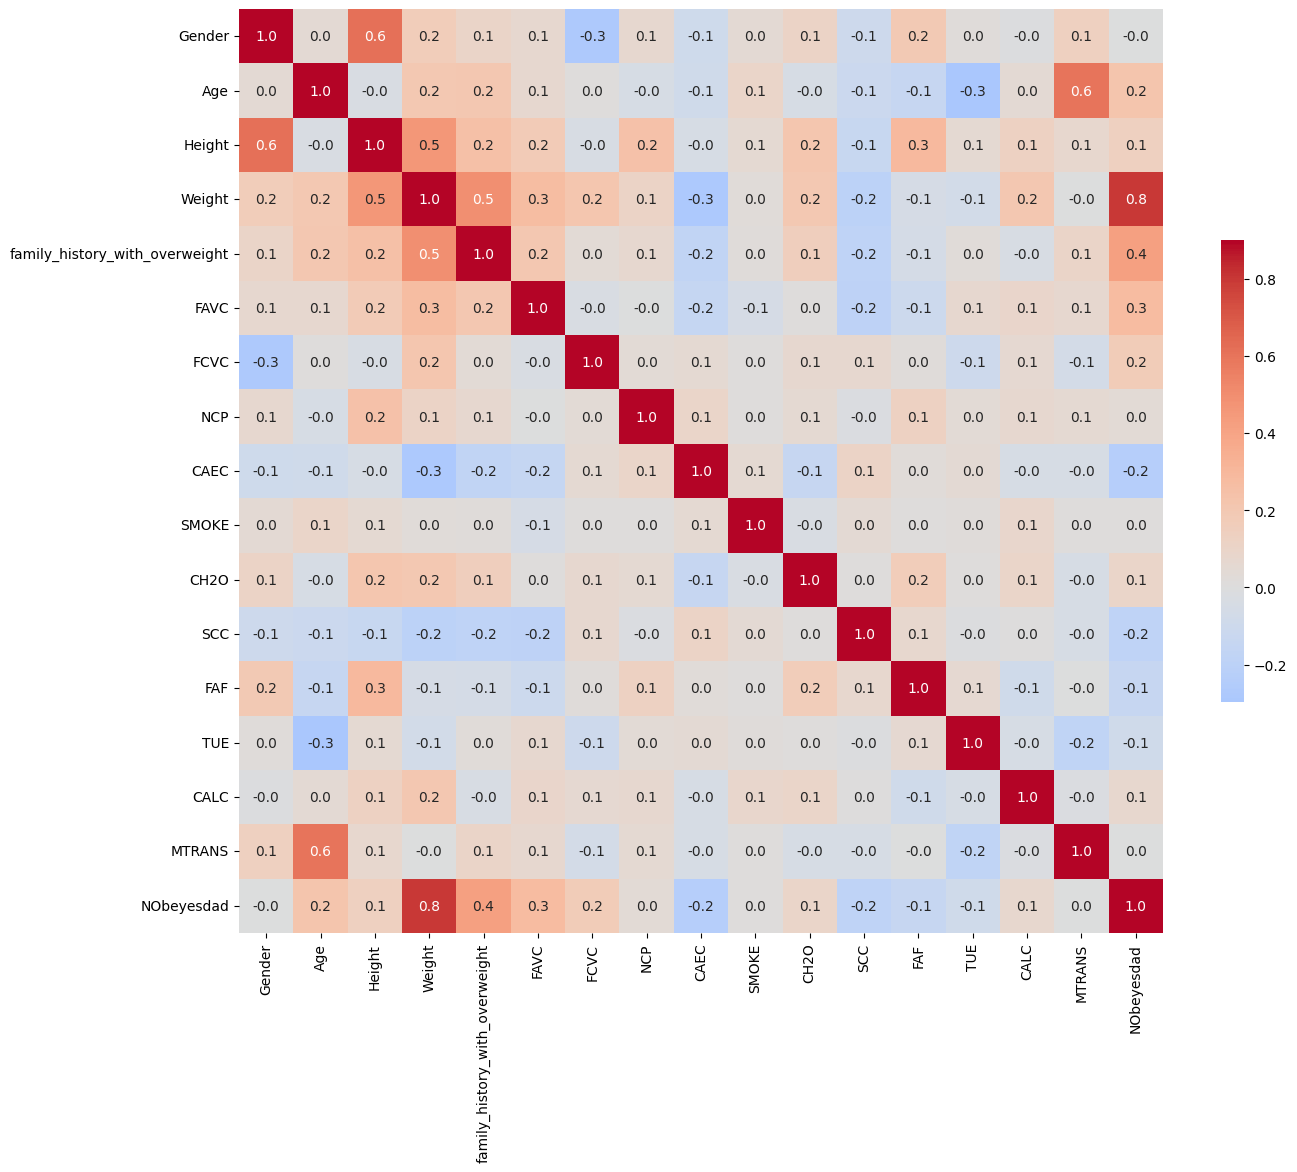

In [237]:
correlation = df.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation, annot= True, cmap= 'coolwarm', vmax=.9, center=0,
            square=True, linewidths=0, fmt= '.1f', cbar_kws={"shrink":.5})

In [238]:
#The chosen variables were the ones with |x| ≥ 0.2
# ['Age', 'Weight', 'family_history_with_overweight','FAVC', 'FCVC','CAEC', 'SCC']

In [239]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

#Logistic Regression

In [240]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [241]:
model = LogisticRegression(solver='liblinear', random_state=0)

#x = df[['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight','FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE','CALC', 'MTRANS']]
x = df[['Age', 'Weight', 'family_history_with_overweight','FAVC', 'FCVC','CAEC', 'SCC']]
y = df['NObeyesdad']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

Using X with all the possible variables resulted in better score

In [242]:
#Standardize the data, in this case, did not improve perfomance
#scaler = StandardScaler()
#x_train = scaler.fit_transform(x_train)
#x_test = scaler.transform(x_test)

It’s a good practice to standardize the input data that you use for logistic regression, although in many cases it’s not necessary. Standardization might improve the performance of your algorithm. It helps if you need to compare and interpret the weights. It’s important when you apply penalization because the algorithm is actually penalizing against the large values of the weights.

In [243]:
model.fit(x_train, y_train)
model.classes_

array([0, 1])

In [244]:
y_pred = model.predict(x_test)

In [245]:
coef = model.coef_
intercept = model.intercept_
score_train = model.score(x_train, y_train)
score_test = model.score(x_test, y_test)

print("The coefficients are ", coef)
print("The intercept is ", intercept)
print("The scoretreino is ", score_train)
print("The scoreteste is ", score_test)

The coefficients are  [[ 0.00748304  0.12800895  0.64457758  0.14207318 -0.49544316 -1.01942766
  -0.84812042]]
The intercept is  [-9.95388966]
The scoretreino is  0.8963270142180095
The scoreteste is  0.8652482269503546


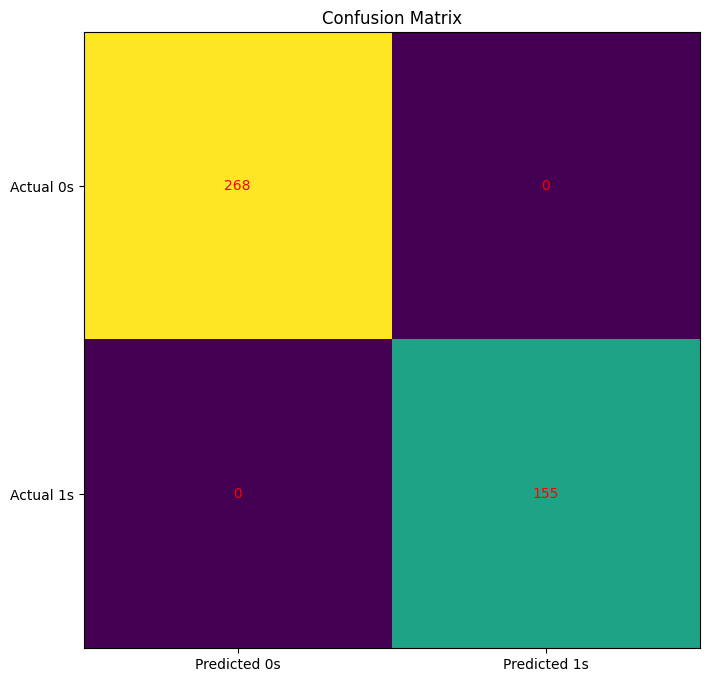

In [246]:
cm = confusion_matrix(y_pred, model.predict(x_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.set_title('Confusion Matrix')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()